In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import os,glob
import numpy as np
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from collections import defaultdict
import collections
from functools import reduce
%matplotlib inline

features = ['n_nu_idade','n_tp_estado_civil','n_tp_escolaridade','n_tp_raca_cor_mae', 'morte_menor_28d', 'year_death']


In [2]:
%%time
Nordeste = pd.read_csv('/home/vm1/Data/FINAL/Nordeste.csv')
Norte = pd.read_csv('/home/vm1/Data/FINAL/Norte.csv')
Centro_Oeste = pd.read_csv('/home/vm1/Data/FINAL/Centro_Oeste.csv')
Sudeste = pd.read_csv('/home/vm1/Data/FINAL/Sudeste.csv')
Sul = pd.read_csv('/home/vm1/Data/FINAL/Sul.csv')
BR = pd.concat([Norte, Nordeste, Sul, Sudeste, Centro_Oeste])

CPU times: user 11.3 s, sys: 3.76 s, total: 15.1 s
Wall time: 15.2 s


## Nomeando variáveis



In [3]:
regioes = [Nordeste, Norte, Sul, Sudeste, Centro_Oeste]

In [4]:
def name_cor(x):   # Features de Raça e cor da mãe
    if x==1:
        return 'Branca'
    elif x==2:
        return 'Preta/Parda'
    elif x==3:
        return 'Amarela/Indígena'
    
ordem_age = ['10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50+']    
def name_age(x):
    if x==1:
        return '10-14'
    elif x==2:
        return '15-19'
    elif x==3:
        return '20-24'
    elif x==4:
        return '25-29'
    elif x==5:
        return '30-34'
    elif x==6:
        return '35-39'
    elif x==7:
        return '40-44'
    elif x==8:
        return '45-49'
    else:
        return '50+'
    
def name_conje(x):
    if x==1:
        return 'Single'
    elif x==2:
        return 'Married/Stable union'
    elif x==3:
        return 'Widowed'
    elif x==4:
        return 'Divorced'

ordem_escolaridade = ['None','1-3','4-7','8-11','12+']
def name_estudo_anos(x):
    if x==1:
        return 'None'
    elif x==2:
        return '1-3'
    elif x==3:
        return '4-7'
    elif x==4:
        return '8-11'
    elif x==5:
        return '12+'
    

In [5]:
def label(data):
    data['n_nu_idade'] = data['n_nu_idade'].apply(name_age)
    data['n_tp_escolaridade'] = data['n_tp_escolaridade'].apply(name_estudo_anos)
    data['n_tp_estado_civil'] = data['n_tp_estado_civil'].apply(name_conje)
    data['n_tp_raca_cor_mae'] = data['n_tp_raca_cor_mae'].apply(name_cor)

In [6]:
%%time
label(BR)

CPU times: user 25.3 s, sys: 5.82 s, total: 31.1 s
Wall time: 31.1 s


In [7]:
data = BR

In [8]:
BR_death = data[data.morte_menor_28d == 1]
BR_alive = data[data.morte_menor_28d == 0] 

### Criando dicionários com valores absolutos de nascimentos e mortes e taxas de mort.

In [9]:
data = BR_death
escolaridade_D = data['n_tp_escolaridade'].value_counts()
idade_D = data['n_nu_idade'].value_counts()
estado_civil_D = data['n_tp_estado_civil'].value_counts()
cor_D = data['n_tp_raca_cor_mae'].value_counts()

In [10]:
data = BR
escolaridade = data['n_tp_escolaridade'].value_counts()
idade = data['n_nu_idade'].value_counts()
estado_civil = data['n_tp_estado_civil'].value_counts()
cor = data['n_tp_raca_cor_mae'].value_counts()

In [11]:
escolaridade_tx = (escolaridade_D/escolaridade)*1000
idade_tx = (idade_D/idade)*1000
estado_civil_tx = (estado_civil_D/estado_civil)*1000
cor_tx = (cor_D/cor)*1000

In [13]:
data = BR
l = len(BR)
print(escolaridade*100/l)
print(idade*100/l)
print(estado_civil*100/l)

8-11    50.072608
4-7     26.025341
12+     16.558310
1-3      6.063906
None     1.279836
Name: n_tp_escolaridade, dtype: float64
20-24    27.310718
25-29    24.447038
15-19    18.782266
30-34    17.589833
35-39     8.629159
40-44     2.154996
10-14     0.935276
45-49     0.141207
50+       0.009506
Name: n_nu_idade, dtype: float64
Single                  52.136397
Married/Stable union    46.643213
Divorced                 1.004554
Widowed                  0.215835
Name: n_tp_estado_civil, dtype: float64


No handles with labels found to put in legend.


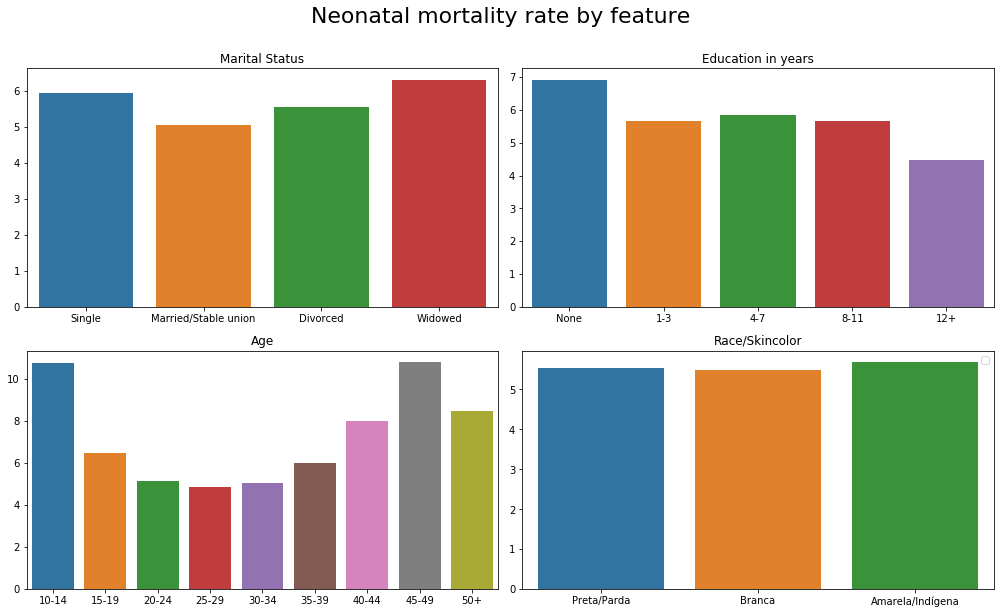

In [13]:
fig, ax = plt.subplots(2,2, figsize=(14,8))

# precisei usar o index do idade_tx pra não dar erro, sei la porque
sns.barplot(idade_tx.index, idade_tx, ax=ax[1,0], order=ordem_age)
sns.barplot(escolaridade_tx.index, escolaridade_tx,  ax=ax[0,1], order=ordem_escolaridade)
sns.barplot(estado_civil_tx.index, estado_civil_tx, ax=ax[0,0])
sns.barplot(cor_tx.index, cor_tx, ax=ax[1,1])

ax[0,0].set(ylabel='', title= 'Marital Status')
ax[0,1].set(ylabel='', title= 'Education in years')

ax[1,0].set(ylabel='', title= 'Age')
ax[1,1].set(ylabel='', title= 'Race/Skincolor')

fig.suptitle('Neonatal mortality rate by feature', fontsize=22, y=1.06)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
%%time
Brasil = pd.read_csv('/home/vm1/Data/Br.csv')

CPU times: user 13.8 s, sys: 3.25 s, total: 17 s
Wall time: 18 s


In [15]:
Brasil.head()

,Unnamed: 0,n_nu_idade,n_tp_estado_civil,n_tp_escolaridade,n_tp_raca_cor_mae,morte_menor_28d,year_birth
0,0,31.0,2.0,3.0,NaN,0.0,2005.0
1,1,24.0,2.0,2.0,NaN,0.0,2005.0
2,2,21.0,5.0,2.0,NaN,0.0,2005.0
3,3,38.0,2.0,3.0,NaN,0.0,2005.0
4,4,18.0,5.0,3.0,NaN,0.0,2005.0


In [16]:
(idade_D['20-24']/idade['20-24'])*1000

5.15486321685086

In [17]:
data = BR

In [18]:
escolaridade = data['n_tp_escolaridade'].value_counts()
idade = data['n_nu_idade'].value_counts()
estado_civil = data['n_tp_estado_civil'].value_counts()
cor = data['n_tp_raca_cor_mae'].value_counts()

escolaridade_percent = escolaridade/sum(escolaridade)*100
idade_percent = idade/sum(idade)*100
estado_civil_percent = estado_civil/sum(estado_civil)*100
cor_percent = cor/sum(cor)*100

feature_count = [escolaridade, idade, estado_civil, cor]

No handles with labels found to put in legend.


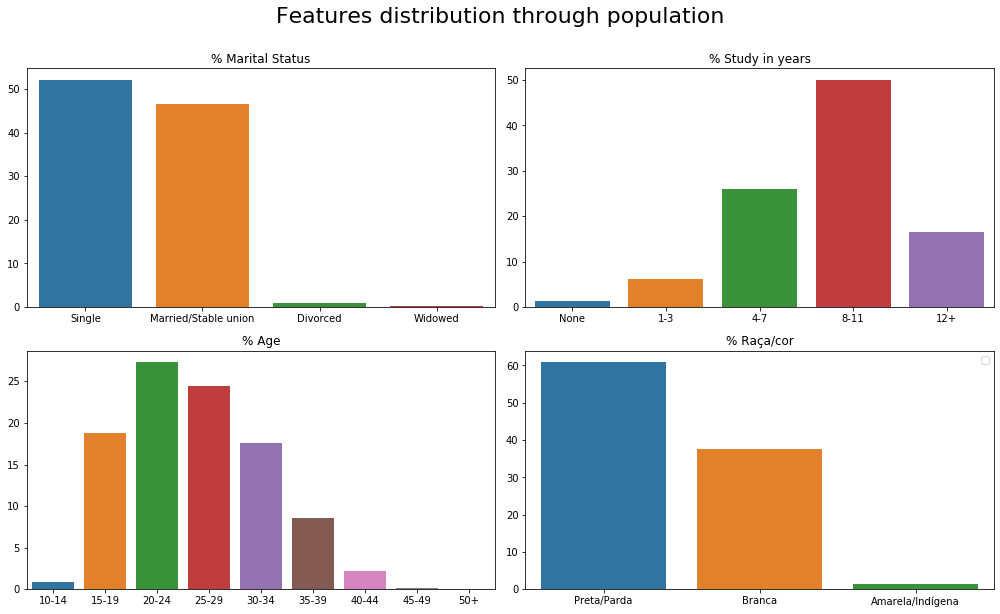

In [19]:


fig, ax = plt.subplots(2,2, figsize=(14,8))


# Colocando escala no y-axis
'''
import matplotlib.ticker as ticker
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax[0,0].yaxis.set_major_formatter(ticks_y)
ax[0,1].yaxis.set_major_formatter(ticks_y)
ax[1,1].yaxis.set_major_formatter(ticks_y)
ax[1,0].yaxis.set_major_formatter(ticks_y)'''


sns.barplot(idade.index, idade_percent, ax=ax[1,0], order=ordem_age)
sns.barplot(escolaridade.index, escolaridade_percent,  ax=ax[0,1], order=ordem_escolaridade)
sns.barplot(estado_civil.index, estado_civil_percent, ax=ax[0,0])
sns.barplot(cor.index, cor_percent, ax=ax[1,1])

ax[0,0].set(ylabel='', title= '% Marital Status')
ax[0,1].set(ylabel='', title= '% Study in years')

ax[1,0].set(ylabel='', title= '% Age')
ax[1,1].set(ylabel='', title= '% Raça/cor')

fig.suptitle('Features distribution through population', fontsize=22, y=1.06)
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


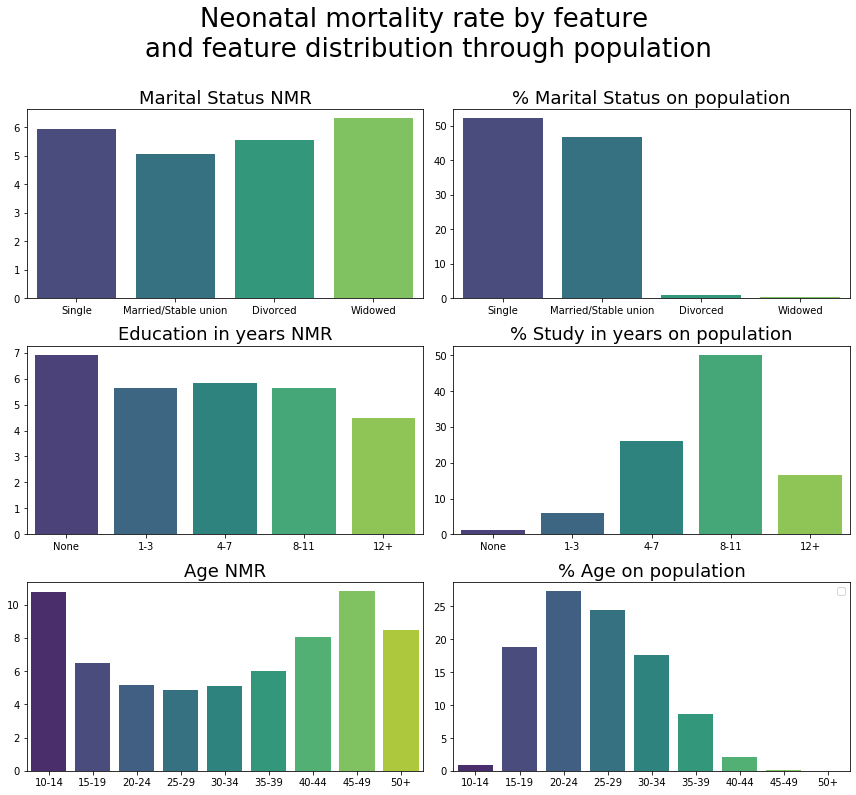

In [20]:
fig, ax = plt.subplots(3,2, figsize=(12,10))

sns.barplot(estado_civil_tx.index, estado_civil_tx, ax=ax[0,0], palette='viridis')
sns.barplot(estado_civil.index, estado_civil_percent, ax=ax[0,1], palette='viridis')

sns.barplot(escolaridade_tx.index, escolaridade_tx,  ax=ax[1,0], order=ordem_escolaridade, palette='viridis')
sns.barplot(escolaridade.index, escolaridade_percent,  ax=ax[1,1], order=ordem_escolaridade, palette='viridis')

sns.barplot(idade_tx.index, idade_tx, ax=ax[2,0], order=ordem_age, palette='viridis')
sns.barplot(idade.index, idade_percent, ax=ax[2,1], order=ordem_age, palette='viridis')

ax[0,0].set(ylabel='', title= 'Marital Status NMR')
ax[0,0].set_title('Marital Status NMR', fontsize=18)

ax[1,0].set(ylabel='', title= 'Education in years NMR')
ax[1,0].set_title('Education in years NMR', fontsize=18)

ax[2,0].set(ylabel='', title= 'Age NMR')
ax[2,0].set_title('Age NMR', fontsize=18)


ax[0,1].set(ylabel='', title= '% Marital Status on population')
ax[0,1].set_title('% Marital Status on population', fontsize=18)

ax[1,1].set(ylabel='', title= '% Study in years on population')
ax[1,1].set_title('% Study in years on population', fontsize=18)

ax[2,1].set(ylabel='', title= '% Age on population')
ax[2,1].set_title('% Age on population', fontsize=18)



fig.suptitle('Neonatal mortality rate by feature \nand feature distribution through population', fontsize=26, y=1.1)

plt.legend()
plt.tight_layout()
plt.show()

In [21]:
for n in estado_civil_tx.values:
    print(str(n)[0:5])
    
print(estado_civil_tx)

5.932
5.054
5.563
6.309
Single                  5.932547
Married/Stable union    5.054380
Divorced                5.563478
Widowed                 6.309885
Name: n_tp_estado_civil, dtype: float64


In [22]:
from statistics import mean, median, mode, pstdev



# Precisa calcular separado pra não estourar

'''

print('Medidas tendência dados geral \n',

      'mean:, '"%.2f" % mean(BR_raw['n_nu_idade'].dropna()), 

      'median', median(BR_raw['n_nu_idade']),

      'mode', mode(BR_raw['n_nu_idade']),

     'pop std', "%.2f" % pstdev(BR_raw['n_nu_idade'].dropna()))

​

print('Medidas tendência óbito neonatal \n',

      'mean'"%.2f" % mean(BR_death['n_nu_idade']),

      'median', median(BR_death['n_nu_idade']),

      'mode' , mode(BR_death['n_nu_idade']),

     'pop std' , "%.2f" % pstdev(BR_death['n_nu_idade']))

    

'''



'\n\nprint(\'Medidas tendência dados geral \n\',\n\n      \'mean:, \'"%.2f" % mean(BR_raw[\'n_nu_idade\'].dropna()), \n\n      \'median\', median(BR_raw[\'n_nu_idade\']),\n\n      \'mode\', mode(BR_raw[\'n_nu_idade\']),\n\n     \'pop std\', "%.2f" % pstdev(BR_raw[\'n_nu_idade\'].dropna()))\n\n\u200b\n\nprint(\'Medidas tendência óbito neonatal \n\',\n\n      \'mean\'"%.2f" % mean(BR_death[\'n_nu_idade\']),\n\n      \'median\', median(BR_death[\'n_nu_idade\']),\n\n      \'mode\' , mode(BR_death[\'n_nu_idade\']),\n\n     \'pop std\' , "%.2f" % pstdev(BR_death[\'n_nu_idade\']))\n\n    \n\n'

In [23]:
BR_death = Brasil[Brasil.morte_menor_28d == 1]
BR_alive = Brasil[Brasil.morte_menor_28d == 0] 

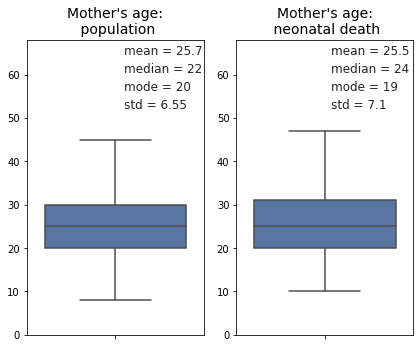

In [24]:
'n_nu_idade'  'morte_menor_28d'
'data_raw'

fig, ax = plt.subplots(1,2,figsize=(6,5))

ax[1].set_ylim([0,68])
ax[0].set_ylim([0,68])

measures_BR = ['mean = 25.7','median = 22','mode = 20','std = 6.55']
measures_BR_death = ['mean = 25.5','median = 24','mode = 19','std = 7.1']

sns.set(style="whitegrid")

sns.boxplot(x=BR_alive['n_nu_idade'] ,ax=ax[0], orient='v', fliersize=0)
sns.boxplot(x=BR_death['n_nu_idade'] ,ax=ax[1], orient='v', fliersize=0)

ax[0].set_title('Mother\'s age:\n population', y=1.00, fontsize=14)
ax[1].set_title('Mother\'s age:\n neonatal death', y=1.00, fontsize=14)
ax[0].set_ylabel('')
ax[1].set_ylabel('')

\

from matplotlib.lines import Line2D

'''handle_1 = [Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='b', markersize=5),
            Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='b', markersize=5),
            Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='b', markersize=5)]'''



'''fig.legend(measures2,loc =(.32,.8))
fig.legend(measures1,loc =(.82,.8))'''

x1, x2 = .3 , .78
y1 = .88
yadd = .05

plt.figtext(x1, y1-yadd, measures_BR[0])
plt.figtext(x1, y1-yadd*2, measures_BR[1])
plt.figtext(x1, y1-yadd*3, measures_BR[2])
plt.figtext(x1, y1-yadd*4, measures_BR[3])
plt.figtext(x2, y1-yadd, measures_BR_death[0])
plt.figtext(x2, y1-yadd*2, measures_BR_death[1])
plt.figtext(x2, y1-yadd*3, measures_BR_death[2])
plt.figtext(x2, y1-yadd*4, measures_BR_death[3])




plt.tight_layout()
plt.show()